## Basic Text Analytics Example
The goal is to extract the text content and then perform text processing and analysis to identify and visualize the co-occurrence of the keywords. 
This example shows how to create a co-occurrence network using a bag-of-words model


Given a corpus of documents, a co-occurrence network is an undirected graph, with nodes corresponding to unique words in a vocabulary and edges corresponding to the frequency of words co-occurring in a document. Use co-occurrence networks to visualize and extract information of the relationships between words in a corpus of documents. For example, you can use a co-occurrence network to discover which words commonly appear with a specified wors. This process will take a few steps

Extract Text: Use PyPDF2 or PDFMiner to extract text from the PDF.
Preprocess Text: Use NLTK or spaCy to tokenize the text, remove stopwords and perform lemmatization.
Identify Keywords and their Co-occurrences: Determine the locations of the keywords in the text and identify when two keywords appear close to each other.
Construct Network: Use NetworkX to create a network graph where nodes represent keywords and edges represent the co-occurrence between them.
Visualize Network: Use matplotlib or seaborn to visualize the network.

In [1]:
import re

filename = "text_abstract.txt"

with open(filename, 'r') as file:
    text_data = file.read()

# Pattern to match a word character followed by . ! or ? and then a space
pattern = r'\w[.!?]\s'

# Split the text into sentences
text_data = re.split(pattern, text_data)

# Replace commas, colons, semicolons, parentheses with an empty string
text_data = [re.sub(r'[,:;)(]', '', sentence) for sentence in text_data]

# Convert to string array (list in Python)
text_data = [str(sentence) for sentence in text_data]

# Display the sentences
print(text_data)




['The Groningen gas field in the Netherlands has been a major source of natural gas in Europe for the past few decade', 'There are approximately 350 wells drilled in the field that either already are or will be plugged and abandoned in the near futur', 'In this work we developed a two-phase two-component numerical model based on the stratigraphy and the petrophysical data from a well in the Groningen fiel', 'The focus was to estimate the magnitude of methane leakage from the abandoned reservoir and the shallow gas-bearing formation', 'Methane is a potent greenhouse gas and fugitive methane emission from abandoned wells is of concer', 'The results indicate that highly depleted reservoirs are not a likely source of leakage as long as they are not re-pressurize', 'However shallow gas-bearing formations capable of bulk gas flow can pose a significant leakage ris', 'Permeable intermediate formations between the gas source and freshwater aquifers can act as a buffer zone reducing the maximum

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming text_data is a list of sentences as from the previous code
# Tokenizing each sentence into words
documents = [word_tokenize(sentence.lower()) for sentence in text_data]

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords and punctuation
documents = [[word for word in document if word not in stop_words and word not in string.punctuation] for document in documents]

# Display the documents
for document in documents:
    print(document)



['groningen', 'gas', 'field', 'netherlands', 'major', 'source', 'natural', 'gas', 'europe', 'past', 'decade']
['approximately', '350', 'wells', 'drilled', 'field', 'either', 'already', 'plugged', 'abandoned', 'near', 'futur']
['work', 'developed', 'two-phase', 'two-component', 'numerical', 'model', 'based', 'stratigraphy', 'petrophysical', 'data', 'well', 'groningen', 'fiel']
['focus', 'estimate', 'magnitude', 'methane', 'leakage', 'abandoned', 'reservoir', 'shallow', 'gas-bearing', 'formation']
['methane', 'potent', 'greenhouse', 'gas', 'fugitive', 'methane', 'emission', 'abandoned', 'wells', 'concer']
['results', 'indicate', 'highly', 'depleted', 'reservoirs', 'likely', 'source', 'leakage', 'long', 're-pressurize']
['however', 'shallow', 'gas-bearing', 'formations', 'capable', 'bulk', 'gas', 'flow', 'pose', 'significant', 'leakage', 'ris']
['permeable', 'intermediate', 'formations', 'gas', 'source', 'freshwater', 'aquifers', 'act', 'buffer', 'zone', 'reducing', 'maximum', 'rate', 'le

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexamin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Joining the tokens back into strings for each document
documents_joined = [" ".join(doc) for doc in documents]

# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting the model and transforming the data
X = vectorizer.fit_transform(documents_joined)

# Getting the feature names (words)
features = vectorizer.get_feature_names_out()

# Getting the counts for each word in each document
counts = X.toarray()

# Display the feature names and counts
print(features)
print(counts)


['100' '30' '350' '450' '4500' 'abandoned' 'act' 'already' 'approximately'
 'aquifer' 'aquifers' 'atmosphere' 'away' 'based' 'bearing' 'buffer'
 'bulk' 'capable' 'cement' 'component' 'concer' 'consequence' 'damaged'
 'data' 'decade' 'depleted' 'developed' 'drilled' 'either' 'emission'
 'emissions' 'estimate' 'europe' 'extends' 'fiel' 'field' 'flow' 'focus'
 'formation' 'formations' 'freshwater' 'fugitive' 'futur' 'gas'
 'greenhouse' 'groningen' 'high' 'higher' 'highly' 'however' 'identify'
 'indicate' 'intermediate' 'kg' 'leakage' 'less' 'likely' 'local' 'long'
 'magnitude' 'major' 'maximum' 'md' 'methane' 'mildly' 'model' 'natural'
 'near' 'netherlands' 'numerical' 'past' 'permeable' 'petrophysical'
 'phase' 'phenomena' 'plugged' 'plume' 'pose' 'potent' 'pressurize'
 'quality' 'rate' 're' 'reducing' 'relative' 'relatively' 'reservoir'
 'reservoirs' 'results' 'ris' 'risk' 'scenario' 'shallow' 'sheath'
 'significant' 'small' 'source' 'stratigraphy' 'study' 'syste' 'two'
 'used' 'viable'

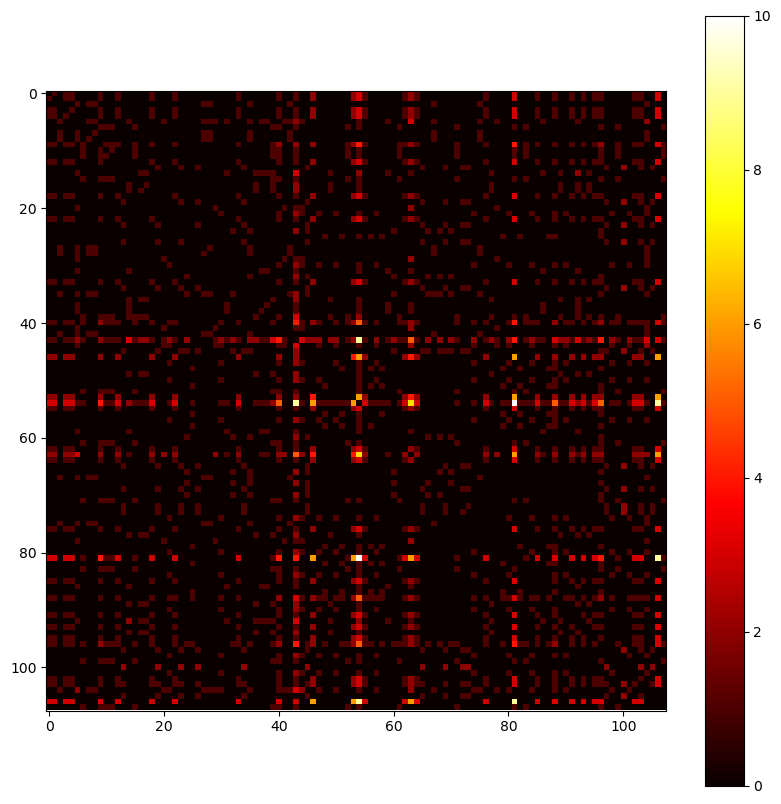

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the co-occurrence matrix
cooccurrence = np.dot(counts.T, counts)

# Subtract the diagonal values (to remove self-co-occurrences)
np.fill_diagonal(cooccurrence, 0)

# Plotting the co-occurrence matrix
plt.figure(figsize=(10, 10))
plt.imshow(cooccurrence, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


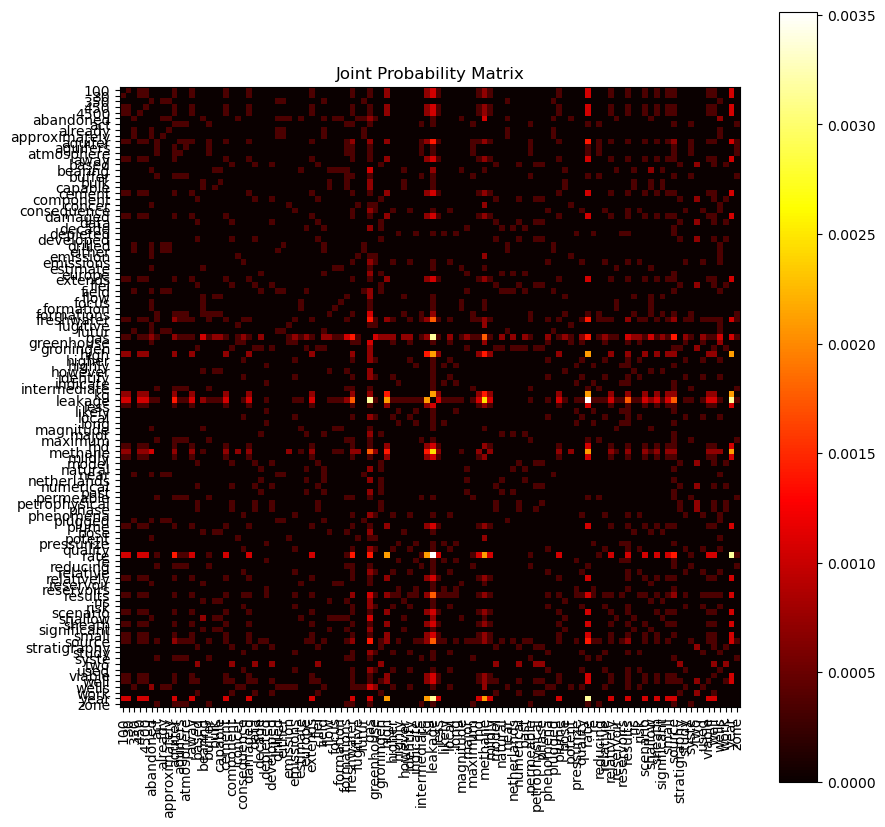

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Probability of each word
word_prob = np.sum(cooccurrence, axis=1) / np.sum(cooccurrence)

# Joint probability matrix
joint_prob_matrix = cooccurrence / np.sum(cooccurrence)

# Plotting the joint probability matrix
plt.figure(figsize=(10, 10))
plt.imshow(joint_prob_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()

# Setting the tick labels
vocab_list = list(features)
plt.xticks(ticks=np.arange(len(vocab_list)), labels=vocab_list, rotation=90)
plt.yticks(ticks=np.arange(len(vocab_list)), labels=vocab_list)

plt.title("Joint Probability Matrix")
plt.show()


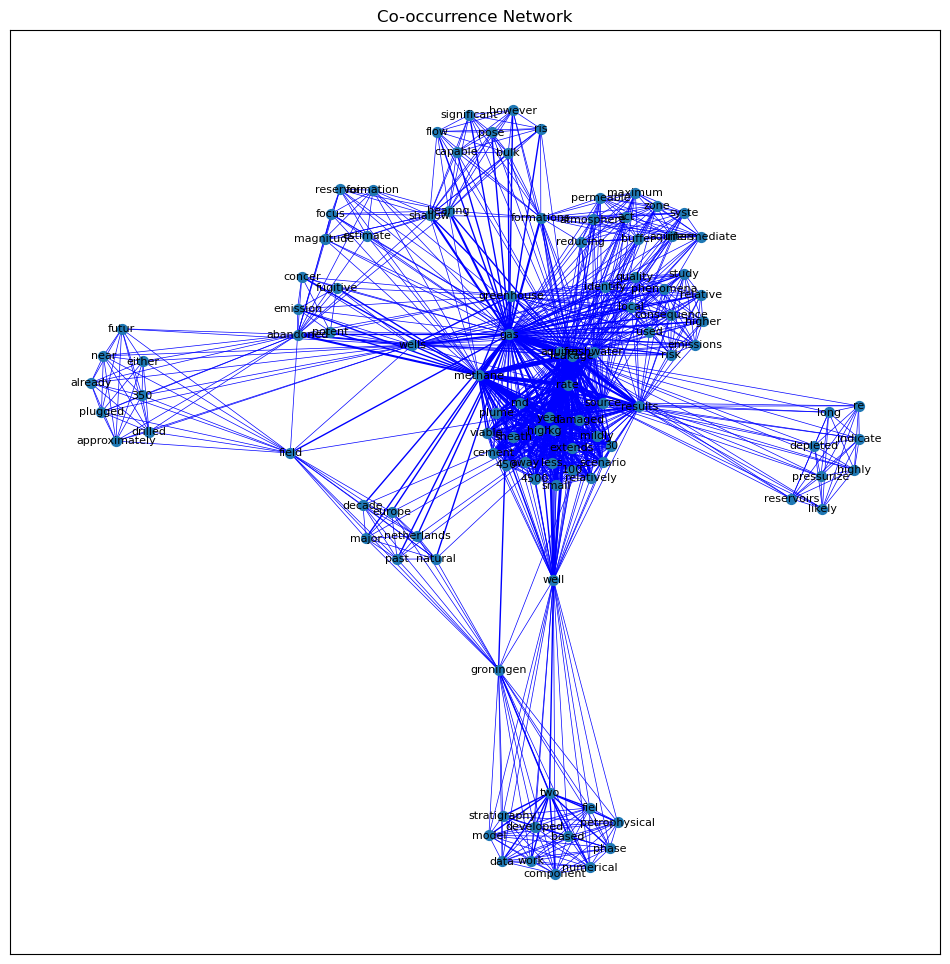

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.from_numpy_array(cooccurrence)

# Relabel nodes to correspond to the bag of words vocabulary
mapping = {node: word for node, word in zip(G.nodes(), features)}
G = nx.relabel_nodes(G, mapping)

# Calculate line widths relative to the maximum weight
weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(weights.values())
LWidths = [5 * weights[edge] / max_weight for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positioning the nodes of the graph
nx.draw_networkx(G, pos, width=LWidths, node_size=50, edge_color='blue', font_size=8, with_labels=True)
plt.title("Co-occurrence Network")
plt.show()


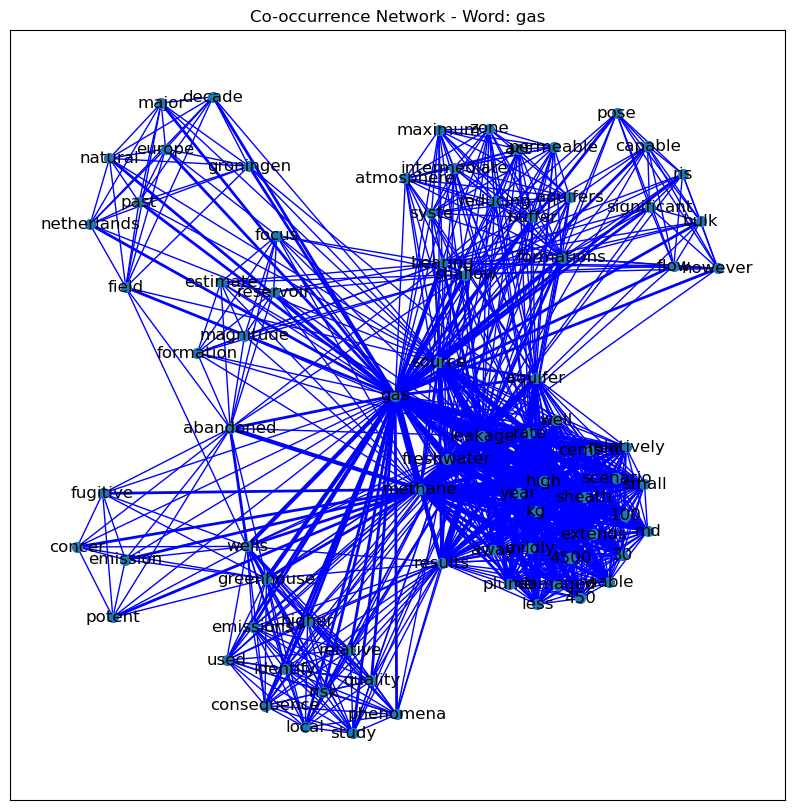

In [6]:
# Find the node for the given word
word = 'gas'
if word in G:
    # Find neighbors of the word
    nbrs = list(G.neighbors(word))
    
    # Subgraph containing the word and its neighbors
    sub_nodes = [word] + nbrs
    H = G.subgraph(sub_nodes)
    
    # Calculate line widths for the subgraph, proportional to the edge weights
    sub_weights = nx.get_edge_attributes(H, 'weight')
    max_sub_weight = max(sub_weights.values(), default=1)
    LWidths = [10 * sub_weights[edge] / max_sub_weight for edge in H.edges()]
    
    # Draw the subgraph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(H)  # Positioning the nodes of the graph
    nx.draw_networkx(H, pos, width=LWidths, node_size=50, edge_color='blue', font_size=12, with_labels=True)
    plt.title(f"Co-occurrence Network - Word: {word}")
    plt.show()
else:
    print(f"Word '{word}' not found in the vocabulary.")
